## Please follow the below structure while attempting the hackathon, make sure to submit only one jupyter file with all the models, and you can always mention your best model by giving it the header as 'Best Model'.

## Please make sure to maintain the clarity of analysis in the notebook with proper headers and inisghts/inferences, so that it can be interpretable 


## Please follow the same format as mentioned below, as you will be evaluated basis on your Jupyter Notebook for L2 selection.

## Importing Necessary Libraries

In [41]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [105]:
df = pd.read_csv('C:/Users/Teja Lakkadasu/Desktop/GREAT LEARNING/Hackathon/Data_Train.csv')
df1 = pd.read_csv('C:/Users/Teja Lakkadasu/Desktop/GREAT LEARNING/Hackathon/Data_Test.csv')

In [106]:
df.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

## 1 Data Cleaning

In this section you can do all the Data cleaning part of all necessary imputations and treatments























In [108]:
df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(exclude = np.number)

In [109]:
df_num.head()

,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee,Loan/No Loan
0,95074,421802,633600.00,0,0,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,17,58598.0,31216.05,0.0,0
1,134131,3964312,85483.20,0,0,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,15,18924.0,11660.49,0.0,0
2,92602,4247560,79200.00,0,0,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,7,15604.0,5637.87,0.0,0
3,22591,197179,61600.00,0,0,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,9,22410.0,15607.17,0.0,1
4,125060,4646684,68053.92,0,0,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,10,36022.0,27472.86,0.0,0


In [110]:
df_cat.head()

,GGGrade,Experience,Validation,Home Status,Designation,File Status,State,Duration,Reason,Claim Type
0,II,>10yrs,Vfied,MOR??AGE,GLENDALE NISSAN,fully paid,California,3 years,debt consolidation,I
1,IV,7yrs,Source Verified,REN?,Business Teacher,whole,NC,5 years,debt consolidation,I
2,III,<1yr,Source Verified,REN?,driver,whole,Florida,5 years,major purchase,I
3,III,<1yr,Vfied,REN?,AvePoint,fully paid,NewJersey,3 years,major purchase,I
4,V,2yrs,Source Verified,REN?,Lead Tester,fully paid,LA,5 years,debt consolidation,I


In [111]:
for i in df_cat.columns:
  print(i)
  print(df[i].nunique())
  print(df[i].unique())
  print('\n')

GGGrade
7
['II' 'IV' 'III' 'V' 'VII' 'VI' 'I']


Experience
11
['>10yrs' '7yrs' '<1yr' '2yrs' '1yrs' '4yrs' '9yrs' '6yrs' '5yrs' '8yrs'
 '3yrs']


Validation
3
['Vfied' 'Source Verified' 'Not Vfied']


Home Status
5
['MOR??AGE' 'REN?' 'OWN' 'OTHER' 'NONE']


Designation
40354
['GLENDALE NISSAN' 'Business Teacher' 'driver' ... 'Interface Coordinator'
 'PARTS CLERK' 'Outside sales rep']


File Status
2
['fully paid' 'whole']


State
49
['California' 'NC' 'Florida' 'NewJersey' 'LA' 'TX' 'CT' 'MI' 'OR' 'AR'
 'Newyork' 'MT' 'CO' 'Ohio' 'NM' 'MN' 'GA' 'WA' 'Maryland' 'AL' 'SC' 'PA'
 'AZ' 'UT' 'MA' 'VA' 'IL' 'WI' 'NV' 'HI' 'RI' 'TN' 'OK' 'VT' 'IN' 'AK'
 'MO' 'NE' 'NH' 'DC' 'WV' 'MS' 'KY' 'KS' 'DE' 'ND' 'SD' 'WY' 'ME']


Duration
2
['3 years' '5 years']


Reason
13
['debt  consolidation' 'major  purchase' 'other' 'credit  card' 'car'
 'home  improvement' 'small  business' 'moving' 'vacation' 'medical'
 'wedding' 'house' 'renewable  energy']


Claim Type
2
['I' 'J']




In [112]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [113]:
df.GGGrade.replace({'I':1 , 'II':2 , 'III':3 , 'IV':4 , 'V':5 , 'VI':6 , 'VII':7} , inplace = True)

df.Experience.replace({'>10yrs':10  , '7yrs':7 , '<1yr' : 0.5,'2yrs':2 ,  '1yrs':1, '4yrs':4, '9yrs':9, '6yrs':6, '5yrs':5, '8yrs':8,'3yrs':3} , inplace = True)

#df.Validation.replace({'Vfied':1, 'Source Verified' :0,'Not Vfied':1} , inplace = True)

#df['Home Status'].replace({'MOR??AGE':1, 'REN?':1, 'OWN':2, 'OTHER':3 ,'NONE':4} , inplace = True)

df['Claim Type'].replace({'I':1 , 'J':2} , inplace = True)

df.Duration.replace({'3 years':3 , '5 years':5} , inplace = True)

df['File Status'].replace({'fully paid':0 , 'whole':1} , inplace = True)

#df['Designation'] = label_encoder.fit_transform(df['Designation'])

In [114]:
df1.GGGrade.replace({'I':1 , 'II':2 , 'III':3 , 'IV':4 , 'V':5 , 'VI':6 , 'VII':7} , inplace = True)

df1.Experience.replace({'>10yrs':10  , '7yrs':7 , '<1yr' : 0.5,'2yrs':2 ,  '1yrs':1, '4yrs':4, '9yrs':9, '6yrs':6, '5yrs':5, '8yrs':8,'3yrs':3} , inplace = True)

#df.Validation.replace({'Vfied':1, 'Source Verified' :0,'Not Vfied':1} , inplace = True)

#df['Home Status'].replace({'MOR??AGE':1, 'REN?':1, 'OWN':2, 'OTHER':3 ,'NONE':4} , inplace = True)

df1['Claim Type'].replace({'I':1 , 'J':2} , inplace = True)

df1.Duration.replace({'3 years':3 , '5 years':5} , inplace = True)

df1['File Status'].replace({'fully paid':0 , 'whole':1} , inplace = True)

#df['Designation'] = label_encoder.fit_transform(df['Designation'])

In [115]:
df = pd.get_dummies(df , columns = ['Home Status' , 'Validation'] , drop_first = True)
df1 = pd.get_dummies(df1 , columns = ['Home Status' , 'Validation'] , drop_first = True)

In [116]:
df.head()

,ID,Asst_Reg,GGGrade,Experience,Yearly Income,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,...,Reason,Claim Type,Due Fee,Loan/No Loan,Home Status_NONE,Home Status_OTHER,Home Status_OWN,Home Status_REN?,Validation_Source Verified,Validation_Vfied
0,95074,421802,2,10.0,633600.00,0,0,GLENDALE NISSAN,12.5496,91300.0,...,debt consolidation,1,0.0,0,0,0,0,0,0,1
1,134131,3964312,4,7.0,85483.20,0,0,Business Teacher,9.0048,27400.0,...,debt consolidation,1,0.0,0,0,0,0,1,1,0
2,92602,4247560,3,0.5,79200.00,0,0,driver,24.9144,32800.0,...,major purchase,1,0.0,0,0,0,0,1,1,0
3,22591,197179,3,0.5,61600.00,0,0,AvePoint,16.5816,7000.0,...,major purchase,1,0.0,1,0,0,0,1,0,1
4,125060,4646684,5,2.0,68053.92,0,0,Lead Tester,40.0512,70800.0,...,debt consolidation,1,0.0,0,0,0,0,1,1,0


In [117]:
df.columns

Index(['ID', 'Asst_Reg', 'GGGrade', 'Experience', 'Yearly Income',
       'Unpaid 2 years', 'Already Defaulted', 'Designation', 'Debt to Income',
       'Postal Code', 'Lend Amount', 'Deprecatory Records', 'Interest Charged',
       'Usage Rate', 'Inquiries', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'File Status', 'State', 'Account Open',
       'Total Unpaid CL', 'Duration', 'Unpaid Amount', 'Reason', 'Claim Type',
       'Due Fee', 'Loan/No Loan', 'Home Status_NONE', 'Home Status_OTHER',
       'Home Status_OWN', 'Home Status_REN?', 'Validation_Source Verified',
       'Validation_Vfied'],
      dtype='object')

In [118]:
df.drop(['Designation'] , inplace = True ,axis = 1)
df1.drop(['Designation'] , inplace = True ,axis = 1)

In [119]:
label_encoder = preprocessing.LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])
df['Reason'] = label_encoder.fit_transform(df['Reason'])
label_encoder = preprocessing.LabelEncoder()
df1['State'] = label_encoder.fit_transform(df1['State'])
df1['Reason'] = label_encoder.fit_transform(df1['Reason'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          87500 non-null  int64  
 1   Asst_Reg                    87500 non-null  int64  
 2   GGGrade                     87500 non-null  int64  
 3   Experience                  87500 non-null  float64
 4   Yearly Income               81925 non-null  float64
 5   Unpaid 2 years              87500 non-null  int64  
 6   Already Defaulted           87500 non-null  int64  
 7   Debt to Income              84011 non-null  float64
 8   Postal Code                 86111 non-null  float64
 9   Lend Amount                 87500 non-null  float64
 10  Deprecatory Records         87500 non-null  int64  
 11  Interest Charged            87500 non-null  float64
 12  Usage Rate                  87500 non-null  float64
 13  Inquiries                   875

In [72]:
df.isnull().sum()/df.shape[0]*100

ID                            0.000000
Asst_Reg                      0.000000
GGGrade                       0.000000
Experience                    0.000000
Yearly Income                 6.371429
Unpaid 2 years                0.000000
Already Defaulted             0.000000
Debt to Income                3.987429
Postal Code                   1.587429
Lend Amount                   0.000000
Deprecatory Records           0.000000
Interest Charged              0.000000
Usage Rate                    0.000000
Inquiries                     0.000000
Present Balance               0.000000
Gross Collection              0.000000
Sub GGGrade                   0.000000
File Status                   0.000000
State                         0.000000
Account Open                  0.000000
Total Unpaid CL               4.784000
Duration                      0.000000
Unpaid Amount                 5.545143
Reason                        0.000000
Claim Type                    0.000000
Due Fee                  

In [120]:
df.fillna(df.mean() , inplace = True)

df1.fillna(df1.mean() , inplace = True)

In [74]:
df.isnull().sum()/df.shape[0]*100

ID                            0.0
Asst_Reg                      0.0
GGGrade                       0.0
Experience                    0.0
Yearly Income                 0.0
Unpaid 2 years                0.0
Already Defaulted             0.0
Debt to Income                0.0
Postal Code                   0.0
Lend Amount                   0.0
Deprecatory Records           0.0
Interest Charged              0.0
Usage Rate                    0.0
Inquiries                     0.0
Present Balance               0.0
Gross Collection              0.0
Sub GGGrade                   0.0
File Status                   0.0
State                         0.0
Account Open                  0.0
Total Unpaid CL               0.0
Duration                      0.0
Unpaid Amount                 0.0
Reason                        0.0
Claim Type                    0.0
Due Fee                       0.0
Loan/No Loan                  0.0
Home Status_NONE              0.0
Home Status_OTHER             0.0
Home Status_OW

## 2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

























In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


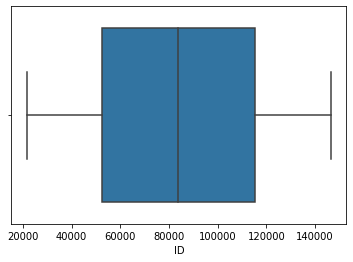

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


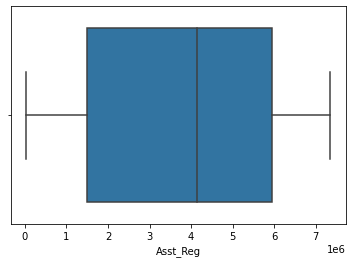

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


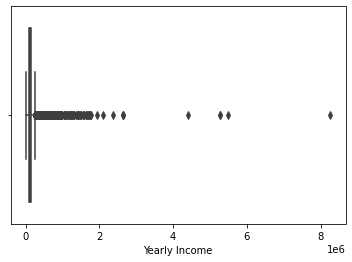

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


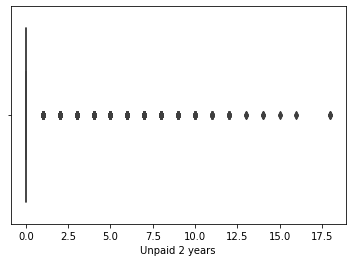

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


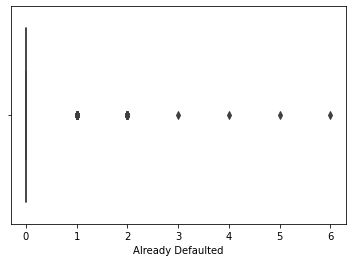

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


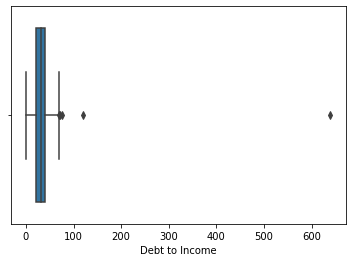

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


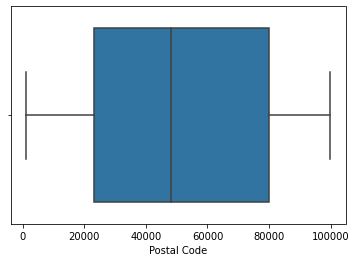

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


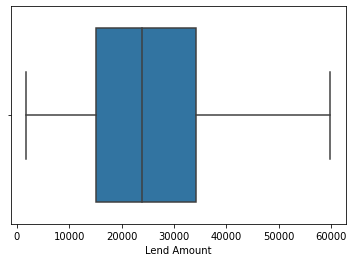

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


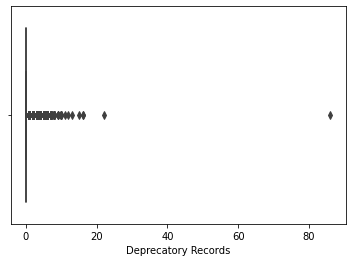

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


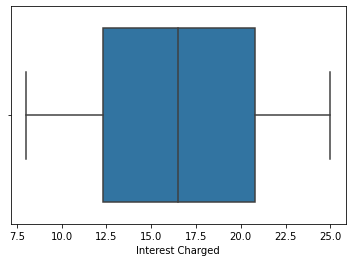

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


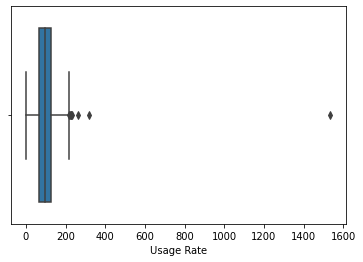

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


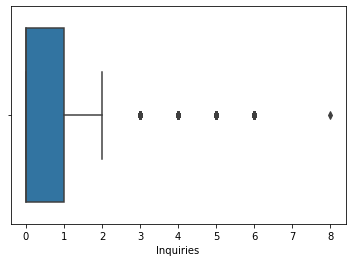

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


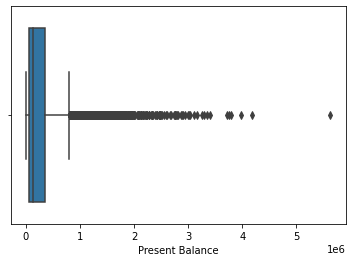

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


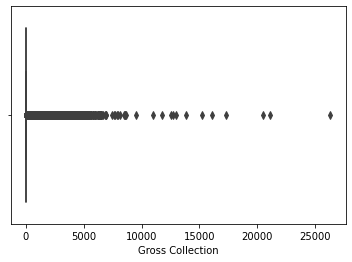

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


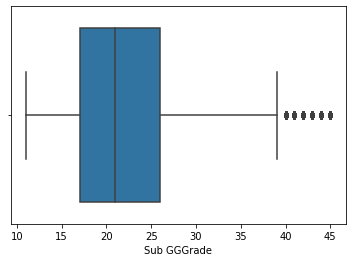

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


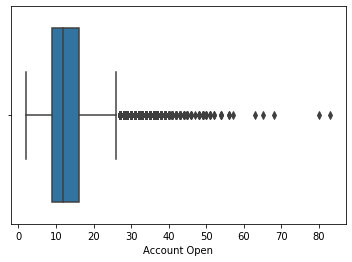

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


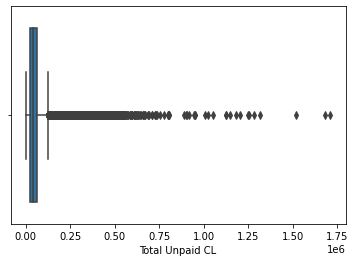

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


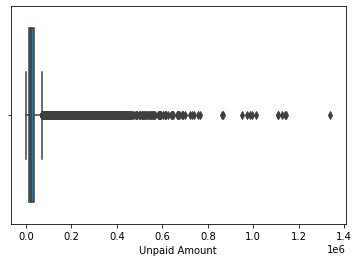

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


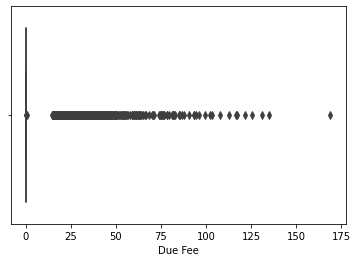

C:\SoftWareHouse\Anaconda3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


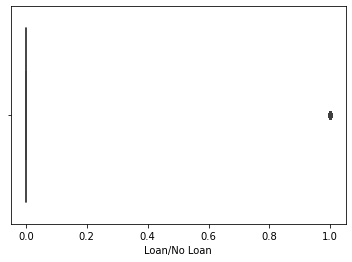

In [78]:
for i in df_num.columns:
    sns.boxplot(df[i])
    plt.show( )

## 3 Feature Engineering

In this section you can implement the feature engineering techniques for dimensionality reduction












In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  int64  
 3   Experience           87500 non-null  float64
 4   Yearly Income        87500 non-null  float64
 5   Unpaid 2 years       87500 non-null  int64  
 6   Already Defaulted    87500 non-null  int64  
 7   Debt to Income       87500 non-null  float64
 8   Postal Code          87500 non-null  float64
 9   Lend Amount          87500 non-null  float64
 10  Deprecatory Records  87500 non-null  int64  
 11  Interest Charged     87500 non-null  float64
 12  Usage Rate           87500 non-null  float64
 13  Inquiries            87500 non-null  int64  
 14  Present Balance      87500 non-null  float64
 15  Gross Collection     87500 non-null 

## 4 Modelling + HyperParameter Tuning

In this you can build various ML models and try tuning the parameters involved to achieve better score

## Model 1

In [146]:
df.drop(['ID'] , inplace = True , axis = 1)

In [147]:
from sklearn.model_selection import train_test_split
x = df.drop(['Loan/No Loan'] , axis = 1)
y = df['Loan/No Loan']
xtrain, xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.2)

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [149]:
sc = StandardScaler()
lr = LogisticRegression()

In [150]:
sxtrain = sc.fit_transform(xtrain)
sxtest = sc.fit_transform(xtest)

In [151]:
lr.fit(sxtrain , ytrain)

LogisticRegression()

In [152]:
sxtest = sc.fit_transform(xtest)

In [153]:
pred = lr.predict(sxtest)

In [154]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [155]:
print(classification_report(ytest , pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14183
           1       0.62      0.33      0.43      3317

    accuracy                           0.83     17500
   macro avg       0.74      0.64      0.67     17500
weighted avg       0.81      0.83      0.81     17500



In [123]:
from sklearn.metrics import accuracy_score , f1_score

## Model 2 - Best Model

In [175]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [176]:
from sklearn.model_selection import train_test_split
x = df.drop(['Loan/No Loan'] , axis = 1)
y = df['Loan/No Loan']
xtrain, xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.2)

In [177]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf=clf.fit(xtrain,ytrain)

In [178]:
print(classification_report(ytest , clf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90     14284
           1       0.62      0.22      0.33      3216

    accuracy                           0.83     17500
   macro avg       0.73      0.60      0.62     17500
weighted avg       0.81      0.83      0.80     17500



In [179]:
from sklearn.model_selection import GridSearchCV

In [182]:
tuned_params = [{'criterion':['entropy' , 'gini'] , 'max_depth':range(2 , 10) , 'min_samples_split':range(2,10)}]

In [183]:
dt = DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = dt , param_grid = tuned_params , cv = 5)
tree_grid.fit(xtrain , ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(2, 10),
                          'min_samples_split': range(2, 10)}])

In [184]:
tree_grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2}

In [198]:
clf=DecisionTreeClassifier(criterion = 'entropy', max_depth =  6, min_samples_split =  2)

In [199]:
clf=clf.fit(xtrain,ytrain)

In [188]:
print(classification_report(ytest , clf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     14284
           1       0.76      0.19      0.30      3216

    accuracy                           0.84     17500
   macro avg       0.80      0.59      0.61     17500
weighted avg       0.83      0.84      0.80     17500



In [201]:
pred = clf.predict(df1)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [203]:
sub = pd.read_csv('C:/Users/Teja Lakkadasu/Desktop/GREAT LEARNING/Hackathon/Data_Test.csv')
submittion_dt = pd.DataFrame(sub['ID'])
submittion_dt.insert(1 ,'Loan/No Loan', pred)
submittion_dt.set_index(['ID'])

,Loan/No Loan
ID,
198980,0
167688,0
198768,0
192564,0
151199,0
...,...
191405,0
164868,0
163156,0


In [207]:
submittion_dt.set_index(['ID'] , inplace = True)

In [208]:
submittion_dt.to_csv('sub_dec_tree.csv')

## Model 3

In [143]:
df1.head()

,ID,Asst_Reg,GGGrade,Experience,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,...,Unpaid Amount,Reason,Claim Type,Due Fee,Home Status_NONE,Home Status_OTHER,Home Status_OWN,Home Status_REN?,Validation_Source Verified,Validation_Vfied
0,198980,1773284,2,2.0,140800.00,0,0,16.9176,90600.0,17955.00,...,15755.94,5,1,0.0,0,0,1,0,1,0
1,167688,5298273,2,10.0,146080.00,0,0,28.6944,32300.0,59850.00,...,68237.55,2,1,0.0,0,0,0,0,0,1
2,198768,189781,6,10.0,202222.24,0,0,51.1560,88000.0,59850.00,...,66272.76,2,1,0.0,0,0,0,0,0,1
3,192564,1530906,2,10.0,105600.00,1,0,27.0144,19900.0,19323.00,...,15595.20,1,1,0.0,0,0,0,0,0,1
4,151199,4410316,3,4.0,151360.00,0,0,10.3824,34900.0,25350.75,...,8850.96,2,1,0.0,0,0,0,0,0,0


In [157]:
df.head()

,Asst_Reg,GGGrade,Experience,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,...,Reason,Claim Type,Due Fee,Loan/No Loan,Home Status_NONE,Home Status_OTHER,Home Status_OWN,Home Status_REN?,Validation_Source Verified,Validation_Vfied
0,421802,2,10.0,633600.00,0,0,12.5496,91300.0,42023.25,0,...,2,1,0.0,0,0,0,0,0,0,1
1,3964312,4,7.0,85483.20,0,0,9.0048,27400.0,38133.00,0,...,2,1,0.0,0,0,0,0,1,1,0
2,4247560,3,0.5,79200.00,0,0,24.9144,32800.0,17100.00,0,...,5,1,0.0,0,0,0,0,1,1,0
3,197179,3,0.5,61600.00,0,0,16.5816,7000.0,5130.00,0,...,5,1,0.0,1,0,0,0,1,0,1
4,4646684,5,2.0,68053.92,0,0,40.0512,70800.0,19665.00,0,...,2,1,0.0,0,0,0,0,1,1,0


In [200]:
df1.head()

,Asst_Reg,GGGrade,Experience,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,...,Unpaid Amount,Reason,Claim Type,Due Fee,Home Status_NONE,Home Status_OTHER,Home Status_OWN,Home Status_REN?,Validation_Source Verified,Validation_Vfied
0,1773284,2,2.0,140800.00,0,0,16.9176,90600.0,17955.00,0,...,15755.94,5,1,0.0,0,0,1,0,1,0
1,5298273,2,10.0,146080.00,0,0,28.6944,32300.0,59850.00,0,...,68237.55,2,1,0.0,0,0,0,0,0,1
2,189781,6,10.0,202222.24,0,0,51.1560,88000.0,59850.00,0,...,66272.76,2,1,0.0,0,0,0,0,0,1
3,1530906,2,10.0,105600.00,1,0,27.0144,19900.0,19323.00,0,...,15595.20,1,1,0.0,0,0,0,0,0,1
4,4410316,3,4.0,151360.00,0,0,10.3824,34900.0,25350.75,1,...,8850.96,2,1,0.0,0,0,0,0,0,0


In [158]:
df1.drop(['ID'] , axis = 1 , inplace = True)

In [159]:
op = sc.fit_transform(df1)
pred1 = lr.predict(op)

In [160]:
pred1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [164]:
sub = pd.read_csv('C:/Users/Teja Lakkadasu/Desktop/GREAT LEARNING/Hackathon/Data_Test.csv')
sub_df = pd.DataFrame(sub['ID'])

In [165]:
sub_df.insert(1 , 'Loan/No Loan' , pred1)

In [171]:
sub_df.set_index(['ID'] , inplace = True)

In [173]:
sub_df.to_csv('submittion_file.csv')

In [191]:
sub_df

,Loan/No Loan
ID,
198980,0
167688,0
198768,0
192564,1
151199,0
...,...
191405,0
164868,0
163156,1
